In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
dataset = pd.read_csv(r"tweet_emotions.csv")
dataset.head(3)

tweet_id sentiment                                            content
0  1956967341     empty  @tiffanylue i know  i was listenin to bad habi...
1  1956967666   sadness  Layin n bed with a headache  ughhhh...waitin o...
2  1956967696   sadness                Funeral ceremony...gloomy friday...

***type of emotion for detection***

In [3]:
dataset["sentiment"].unique()

array(['empty', 'sadness', 'enthusiasm', 'neutral', 'worry', 'surprise',
       'love', 'fun', 'hate', 'happiness', 'boredom', 'relief', 'anger'],
      dtype=object)

In [4]:
dataset.shape

(40000, 3)

**null row**

In [5]:
dataset.isnull().sum()

tweet_id     0
sentiment    0
content      0
dtype: int64

**duplicate row**

In [6]:
dataset.duplicated().sum()

0

**content length of each sentiment**

In [7]:
dataset['sentiment'].value_counts()

sentiment
neutral       8638
worry         8459
happiness     5209
sadness       5165
love          3842
surprise      2187
fun           1776
relief        1526
hate          1323
empty          827
enthusiasm     759
boredom        179
anger          110
Name: count, dtype: int64

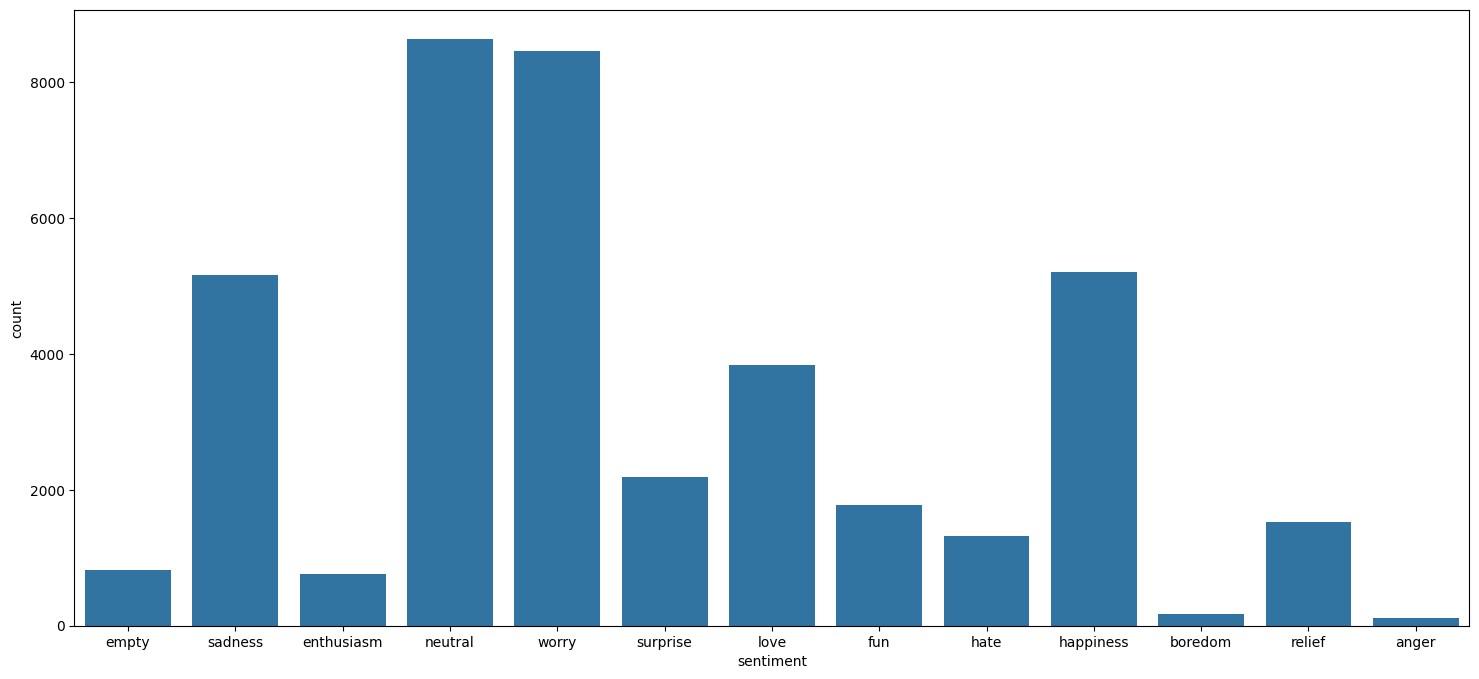

In [8]:
plt.figure(figsize=(18, 8))
sns.countplot(x = dataset['sentiment'])
plt.show()

***Word count images***

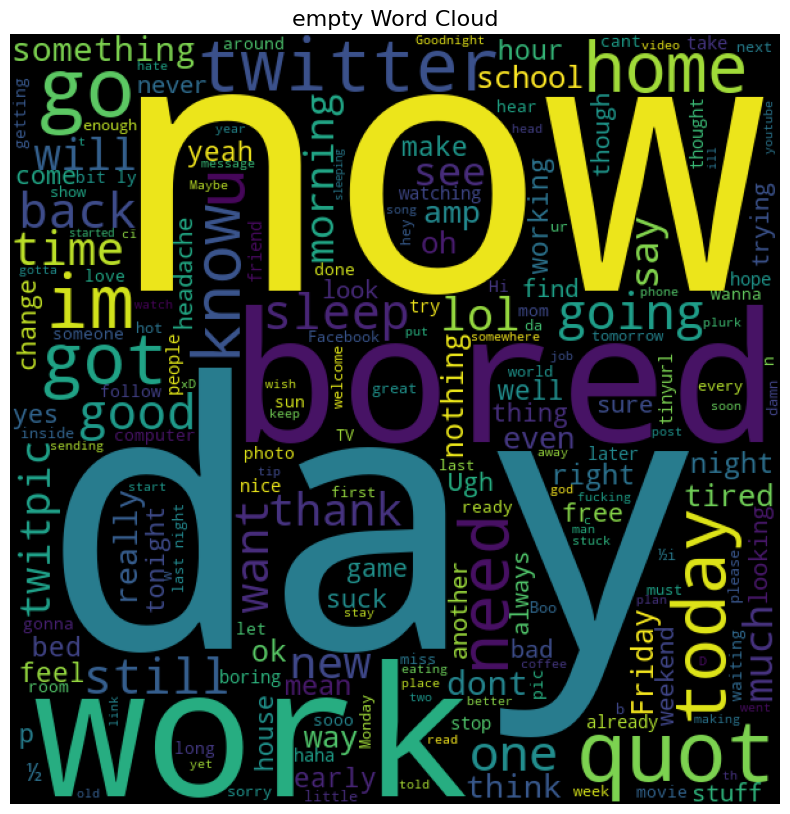

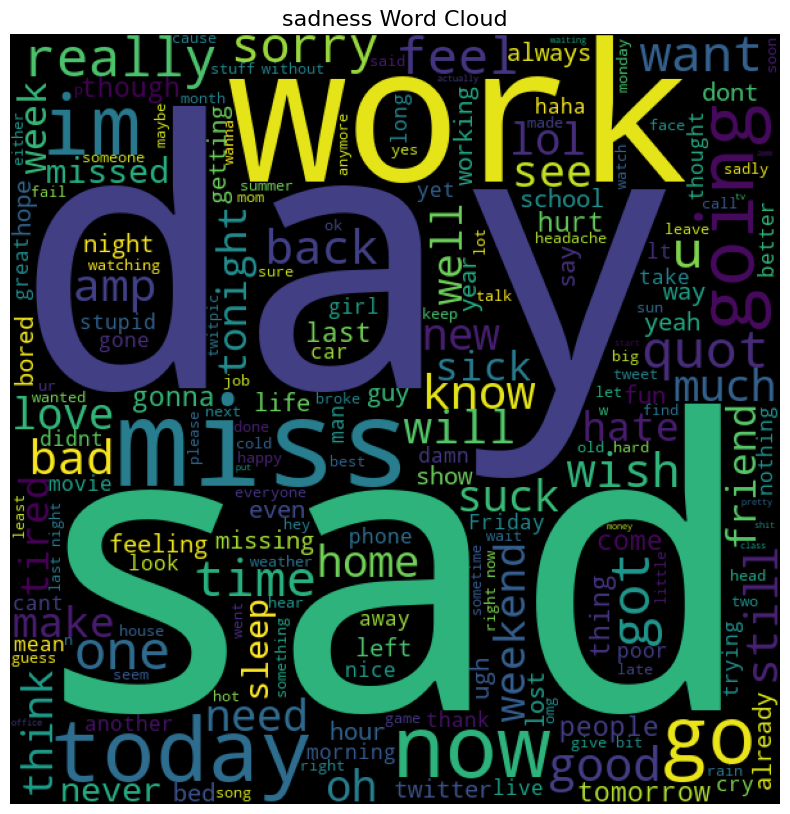

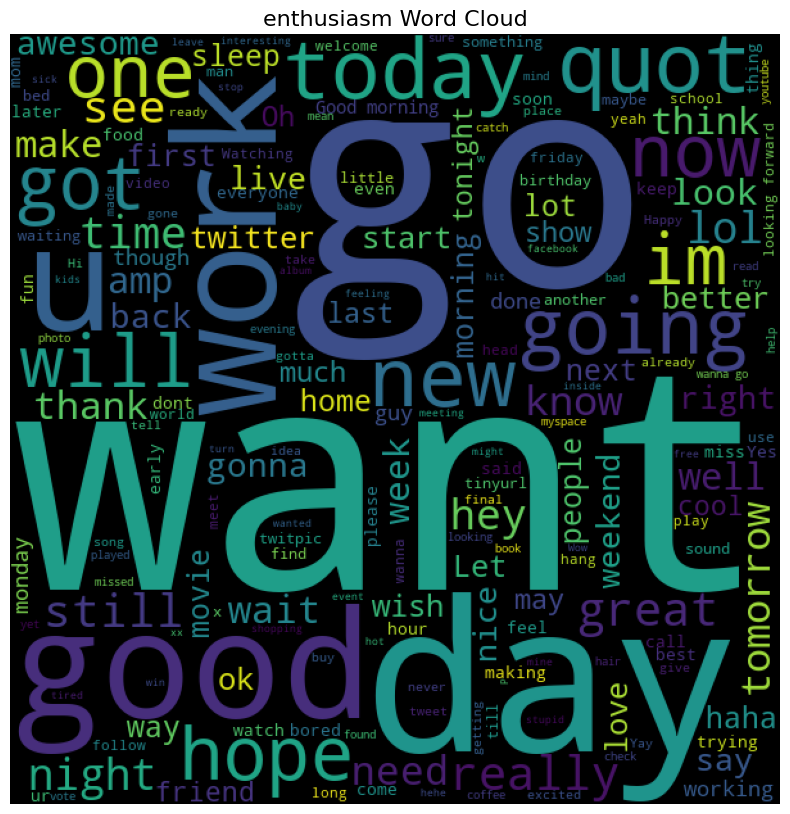

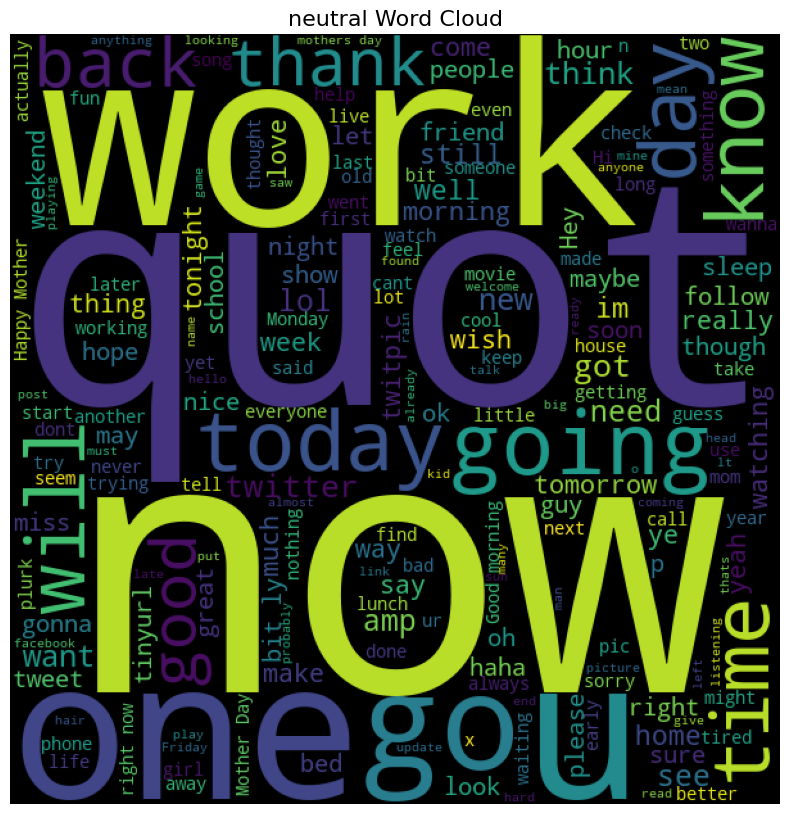

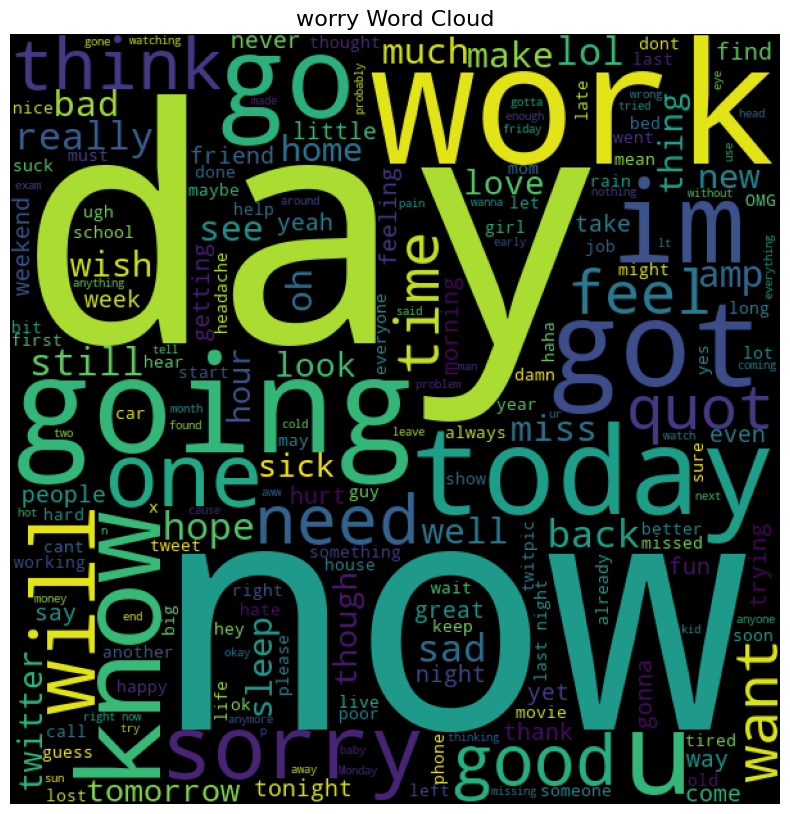

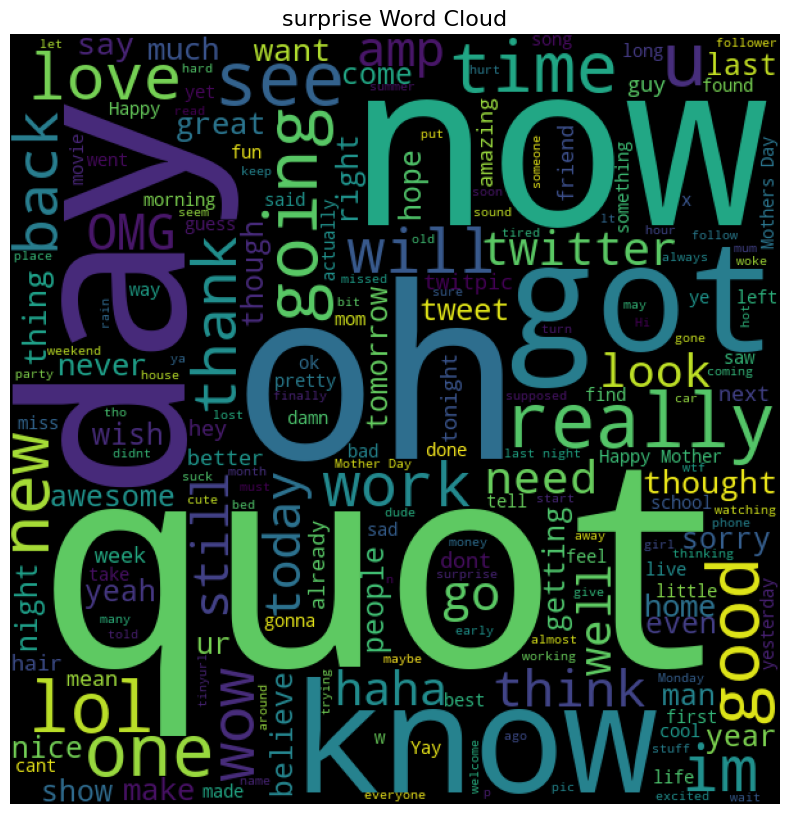

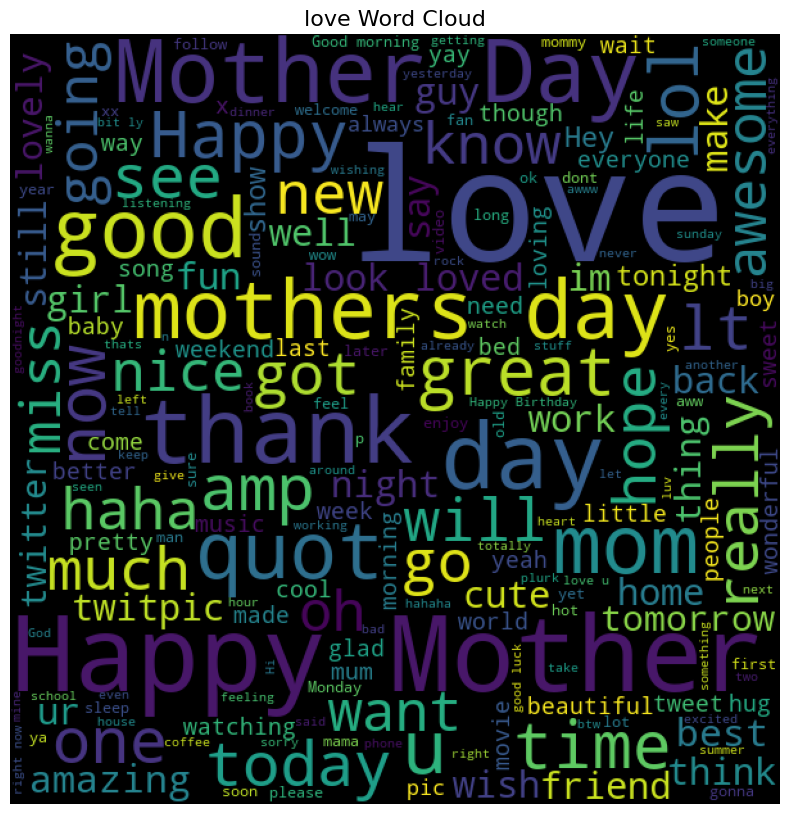

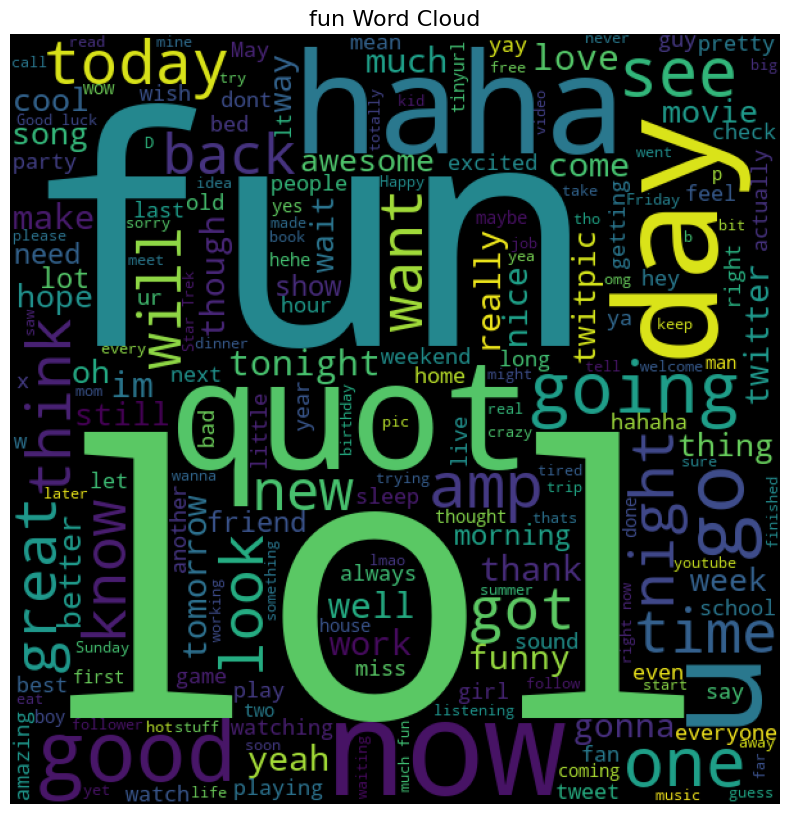

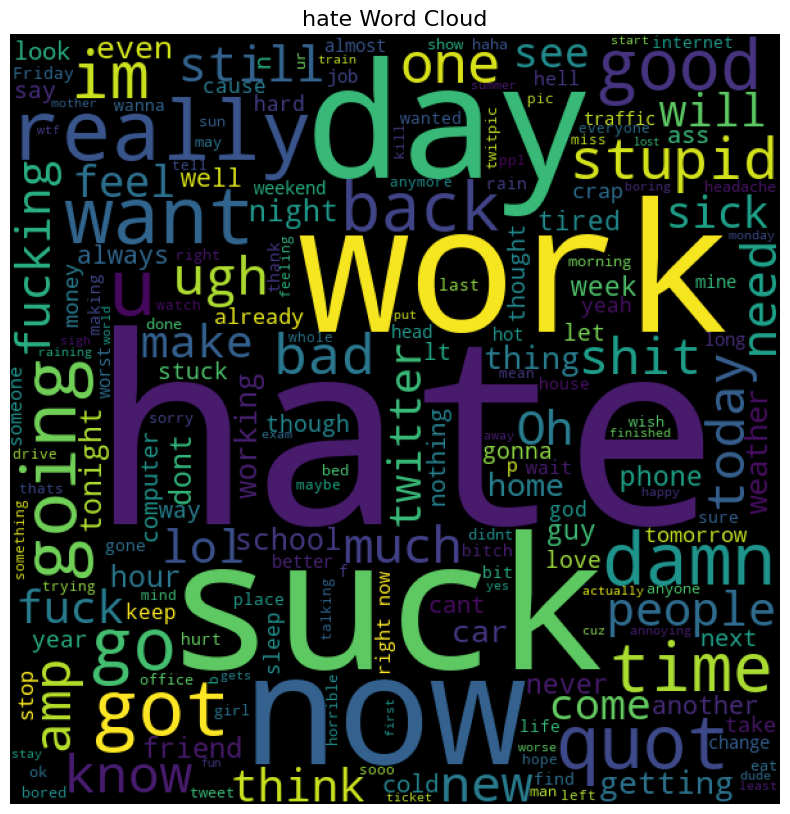

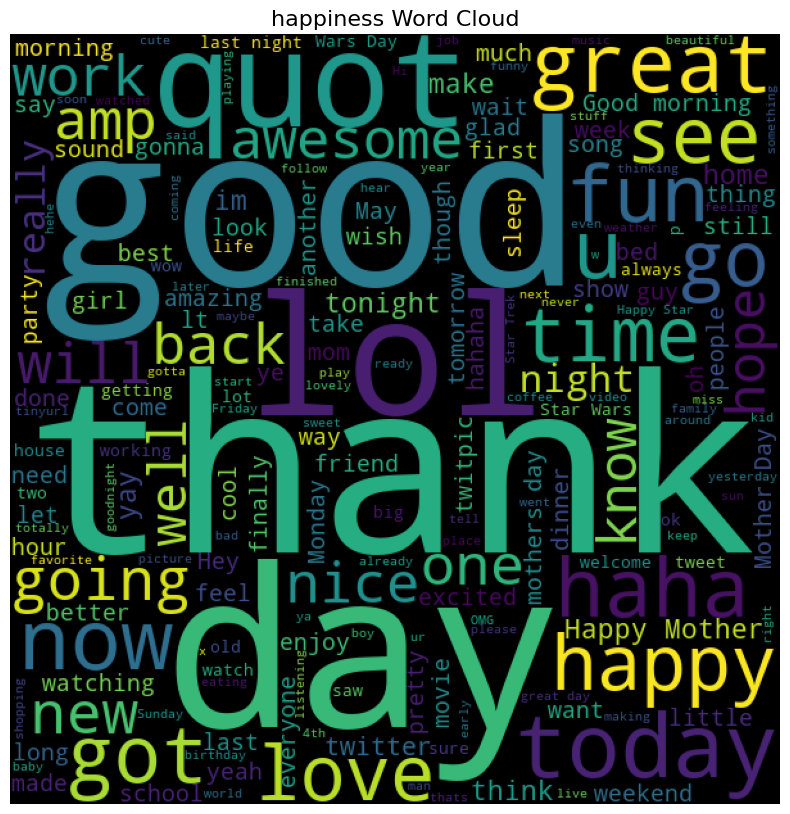

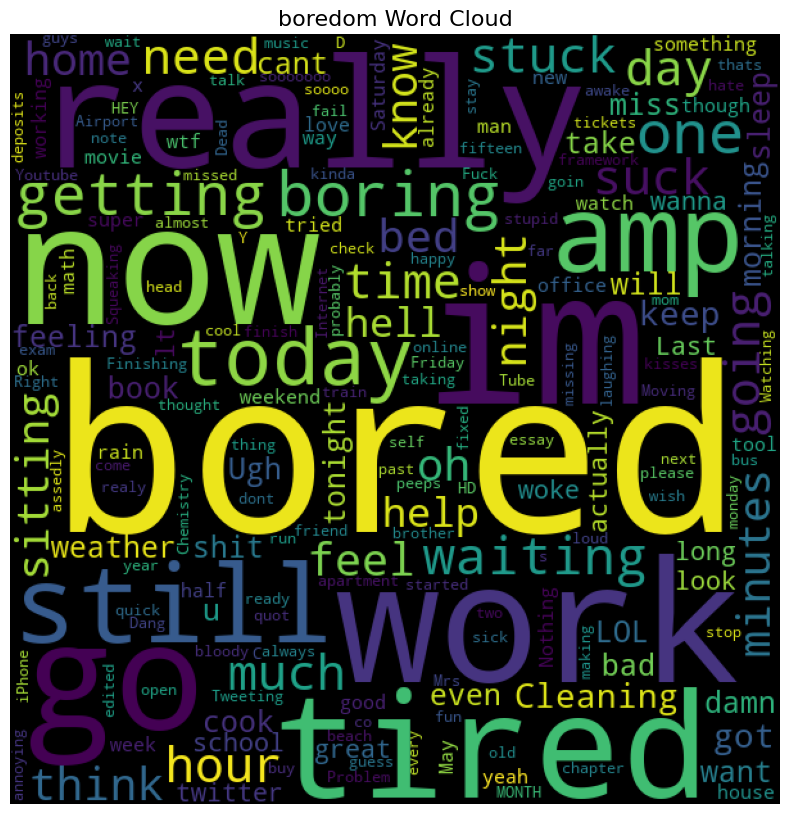

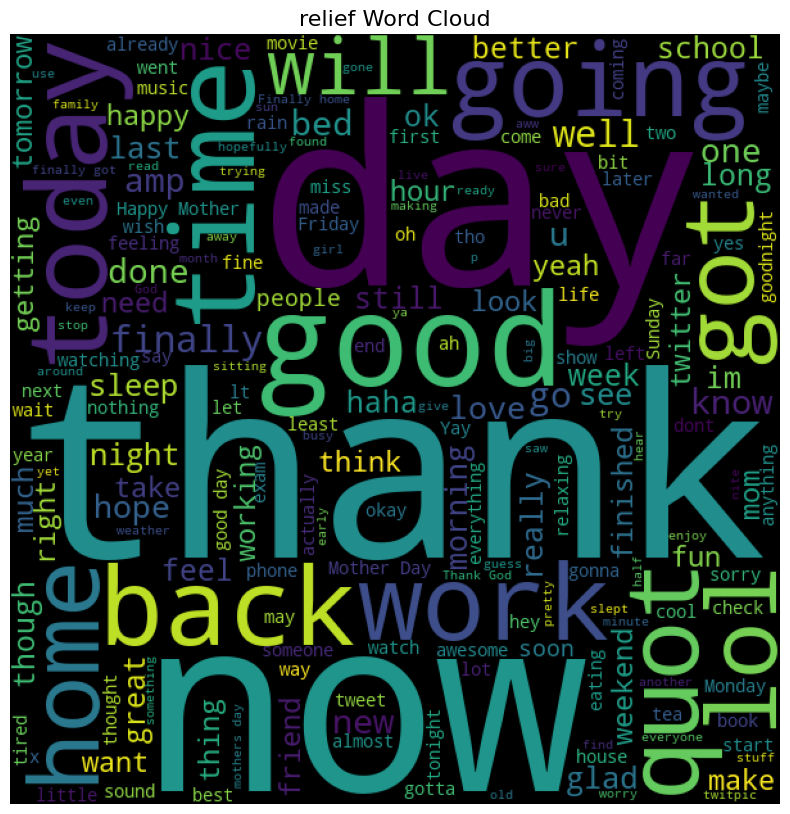

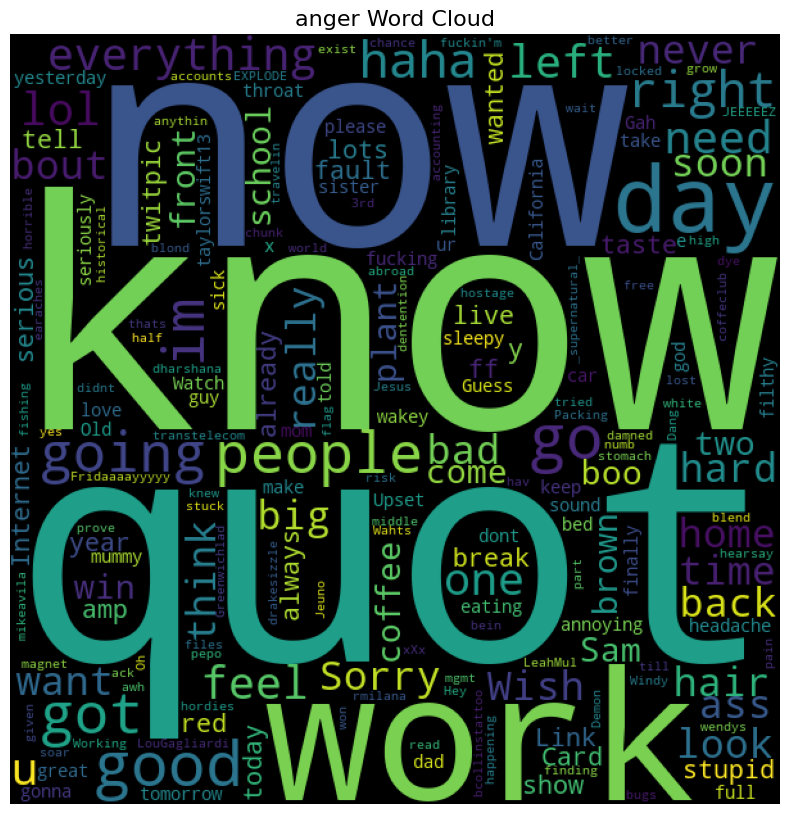

In [9]:
from wordcloud import WordCloud

# Words cloud for each emotions
def words_cloud(wordcloud, df):
    plt.figure(figsize=(10, 10))
    plt.title(df+' Word Cloud', size = 16)
    plt.imshow(wordcloud) 
    plt.axis("off")
emotions_list = dataset['sentiment'].unique()

for emotion in emotions_list:
    text = ' '.join([sentence for sentence in dataset.loc[dataset['sentiment'] == emotion,'content']])
    wordcloud = WordCloud(width = 600, height = 600).generate(text)
    words_cloud(wordcloud, emotion)

**encoding the sentiment**

In [10]:
from sklearn.preprocessing import LabelEncoder

lb = LabelEncoder()
dataset['sentiment'] = lb.fit_transform(dataset['sentiment'])

dataset.head(3)

tweet_id  sentiment                                            content
0  1956967341          2  @tiffanylue i know  i was listenin to bad habi...
1  1956967666         10  Layin n bed with a headache  ughhhh...waitin o...
2  1956967696         10                Funeral ceremony...gloomy friday...

**drop useless column**

In [11]:
dataset.drop(columns=["tweet_id"],inplace=True)
dataset.head(3)

sentiment                                            content
0          2  @tiffanylue i know  i was listenin to bad habi...
1         10  Layin n bed with a headache  ughhhh...waitin o...
2         10                Funeral ceremony...gloomy friday...

# Data preprocessing

***NLP***

In [12]:
from nltk.tokenize.treebank import TreebankWordTokenizer

tokenizer = TreebankWordTokenizer()

In [13]:
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

In [14]:
from nltk.corpus import stopwords

stop_word_english = stopwords.words('english')

from string import punctuation

extra_word = ["``", "''" ]

stop_word = list(punctuation) + stop_word_english + extra_word



In [15]:
from nltk.stem import PorterStemmer

stemmer = PorterStemmer()

# and stemmer.stem(word)

In [16]:
def preprocess_text(text):
         
    tokens = tokenizer.tokenize(text.lower())
    
    # remove stopword and apply lemmatize for root word
    cleaned_tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_word and word.isalpha()]
    
    return ' '.join(cleaned_tokens)


dataset['cleaned_text'] = dataset['content'].apply(preprocess_text)

print(dataset[['content', 'cleaned_text', 'sentiment']].head())


                                             content  \
0  @tiffanylue i know  i was listenin to bad habi...   
1  Layin n bed with a headache  ughhhh...waitin o...   
2                Funeral ceremony...gloomy friday...   
3               wants to hang out with friends SOON!   
4  @dannycastillo We want to trade with someone w...   

                                        cleaned_text  sentiment  
0  tiffanylue know listenin bad habit earlier sta...          2  
1            layin n bed headache ughhhh waitin call         10  
2                     funeral ceremony gloomy friday         10  
3                              want hang friend soon          3  
4  dannycastillo want trade someone houston ticke...          8  


In [17]:
dataset.head(3)

sentiment                                            content  \
0          2  @tiffanylue i know  i was listenin to bad habi...   
1         10  Layin n bed with a headache  ughhhh...waitin o...   
2         10                Funeral ceremony...gloomy friday...   

                                        cleaned_text  
0  tiffanylue know listenin bad habit earlier sta...  
1            layin n bed headache ughhhh waitin call  
2                     funeral ceremony gloomy friday

**vectorize the cleaned_text**

In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the vectorizer
vectorizer = TfidfVectorizer()

# Fit and transform the text data
x = vectorizer.fit_transform(dataset['cleaned_text'])

**Scalling**

In [19]:
from sklearn.preprocessing import StandardScaler

# Scale the features
scaler = StandardScaler(with_mean=False)
x = scaler.fit_transform(x)


In [20]:
y = dataset["sentiment"]

**splitting dataset to train and test**

In [21]:
from sklearn.model_selection import train_test_split, cross_val_score

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=6)

# applying Machine Learning

In [22]:
from itertools import combinations

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier

***single model***

In [ ]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

    
lr = LogisticRegression(solver='saga', max_iter=2000)
lr.fit(x_train, y_train)
    
print(f"train {lr.score(x_train, y_train)*100}")
print(f"test {lr.score(x_test, y_test)*100}") 

# Predict on the training data
train_predictions = lr.predict(x_train)
test_predictions = lr.predict(x_test)

# Get the classification report and accuracy score for the training set
train_classification_report = classification_report(y_train, train_predictions)
train_accuracy = accuracy_score(y_train, train_predictions)
test_accuracy = accuracy_score(y_test, test_predictions)


# Print the metrics
print(f"LogisticRegression - Training Accuracy: {train_accuracy:.2f}, Testing Accuracy: {test_accuracy:.2f}")
print(f"LogisticRegression - Training Classification Report:\n{train_classification_report}\n")
print(f"{'-' * 40}\n")



In [ ]:
# Compute Confusion Matrix
cm = confusion_matrix(y_test, test_predictions)

# Plot Confusion Matrix
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


**single model prediction**

In [ ]:
def predict_emotion(input_text):
    cleaned_text = preprocess_text(input_text)
    input_vectorized = vectorizer.transform([cleaned_text])

    # Predict emotion
    predicted_label = lr.predict(input_vectorized)[0]
    predicted_emotion = lb.inverse_transform([predicted_label])[0]
    label =  np.max(lr.predict(input_vectorized))

    return predicted_emotion,label

# Example usage 
sentences = [
            "i didn't feel humiliated",
            "i feel strong and good overall",
            "im grabbing a minute to post i feel greedy wrong",
            "He was speechles when he found out he was accepted to this new job",
            "This is outrageous, how can you talk like that?",
            "I feel like im all alone in this world",
            "He is really sweet and caring",
            "You made me very crazy",
            "i am ever feeling nostalgic about the fireplace i will know that it is still on the property",
            "i am feeling grouchy",
            "I love you so much, but hate you"
]
            
for sentence in sentences:
    print(sentence)
    pred_emotion, label = predict_emotion(sentence)
    print("Prediction :",pred_emotion)
    # print("Label :",label)
    print(f"{"-" * 60}")



# model with loop

***model list*** 

In [23]:
models = {
    'Linear': LogisticRegression(solver='saga', max_iter=1000) ,
    'MLP': MLPClassifier(max_iter=500), 
    'KNeighbors': KNeighborsClassifier(n_neighbors= 41),
    'DecisionTree': DecisionTreeClassifier(),
    'RandomForest': RandomForestClassifier(n_estimators=10),
    'svc': SVC(kernel="sigmoid")
}


lr = LogisticRegression() 
kn = KNeighborsClassifier(n_neighbors= 41)
sv = SVC(kernel="sigmoid")
rfc = RandomForestClassifier(n_estimators=10)
clf = DecisionTreeClassifier()
mlp = MLPClassifier()

***model loop for all model to run one by one***

In [ ]:
# Loop through each model

for name, model in models.items():
    
    # Fit the model to the training data
    model.fit(x_train, y_train)
      
    # Predict on the training data
    train_predictions = model.predict(x_train)
    test_predictions = model.predict(x_test)

    # Get the classification report and accuracy score for the training set
    train_classification_report = classification_report(y_train, train_predictions)
    train_accuracy = accuracy_score(y_train, train_predictions)
    test_accuracy = accuracy_score(y_test, test_predictions)



    # Print the metrics
    print(f"{name} - Training Accuracy: {train_accuracy:.2f}, Testing Accuracy: {test_accuracy:.2f}")
    print(f"{name} - Training Classification Report:\n{train_classification_report}\n")
    print(f"{'-' * 40}\n")



***loop model prediction***

In [ ]:
def predict_emotion(input_text, models):

    # Predict emotion for the given input text using multiple models.

    cleaned_text = preprocess_text(input_text)
    input_vectorized = vectorizer.transform([cleaned_text])

    predictions = {}
    for model_name, model in models.items():
        predicted_label = model.predict(input_vectorized)[0]
        predicted_emotion = lb.inverse_transform([predicted_label])[0]
        label = np.max(model.predict(input_vectorized))  # Get the highest prediction probability

        predictions[model_name] = {
            "Emotion": predicted_emotion,
            "Label": label
        }

    return predictions

# Example usage 
sentences = [
            "i didn't feel humiliated",
            "i feel strong and good overall",
            "im grabbing a minute to post i feel greedy wrong",
            "He was speechles when he found out he was accepted to this new job",
            "This is outrageous, how can you talk like that?",
            "I feel like im all alone in this world",
            "He is really sweet and caring",
            "You made me very crazy",
            "i am ever feeling nostalgic about the fireplace i will know that it is still on the property",
            "i am feeling grouchy",
            "I love you"
]
            
for sentence in sentences:
    print(f"Sentence: {sentence}")
    predictions = predict_emotion(sentence, models)
    
    for model_name, result in predictions.items():
        print(f"{model_name} Prediction: {result['Emotion']}")
        print(f"{model_name} Label: {result['Label']}")
    
    print("-" * 60)



i didn't feel humiliated
Prediction : sadness
------------------------------------------------------------
i feel strong and good overall
Prediction : neutral
------------------------------------------------------------
im grabbing a minute to post i feel greedy wrong
Prediction : worry
------------------------------------------------------------
He was speechles when he found out he was accepted to this new job
Prediction : happiness
------------------------------------------------------------
This is outrageous, how can you talk like that?
Prediction : sadness
------------------------------------------------------------
I feel like im all alone in this world
Prediction : sadness
------------------------------------------------------------
He is really sweet and caring
Prediction : love
------------------------------------------------------------
You made me very crazy
Prediction : worry
------------------------------------------------------------
i am ever feeling nostalgic about the

In [ ]:
print(dataset["sentiment"].unique())

encoded_values = [2, 10, 3, 8, 12, 11, 7, 4, 6, 5, 1, 9, 0]  # The unique encoded values you want to decode

decoded_labels = lb.inverse_transform(encoded_values)
print(decoded_labels)

[ 2 10  3  8 12 11  7  4  6  5  1  9  0]
['empty' 'sadness' 'enthusiasm' 'neutral' 'worry' 'surprise' 'love' 'fun'
 'hate' 'happiness' 'boredom' 'relief' 'anger']


# deep learning

In [ ]:
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout
from keras.callbacks import EarlyStopping
# from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical

from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical


import re

In [ ]:
df = dataset.copy()

**clean the text and divide it into train and test**

In [ ]:
# Text cleaning function
def text_cleaning(df, column, vocab_size, max_len):
    stemmer = PorterStemmer()
    corpus = []

    for text in df[column]:
        text = re.sub("[^a-zA-Z]", " ", text)
        text = text.lower()
        text = text.split()
        text = [stemmer.stem(word) for word in text if word not in stop_word]
        text = " ".join(text)
        corpus.append(text)

    one_hot_word = [one_hot(input_text=word, n=vocab_size) for word in corpus]
    pad = pad_sequences(sequences=one_hot_word, maxlen=max_len, padding='pre')
    return pad

# Assuming `dataset` is a DataFrame containing the text and labels
x_data = text_cleaning(dataset, "content", vocab_size=11000, max_len=300)
y_data = to_categorical(dataset["sentiment"], num_classes=13)

# Split data into training and test sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=42)


IndexError: index 10 is out of bounds for axis 1 with size 6

***model evaluation***

In [ ]:
# Build and compile the model
model = Sequential()
model.add(Embedding(input_dim=11000, output_dim=150, input_length=300))
model.add(Dropout(0.2))
model.add(LSTM(128))
model.add(Dropout(0.2))
model.add(Dense(64, activation='sigmoid'))
model.add(Dropout(0.2))
model.add(Dense(6, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
# callback = EarlyStopping(monitor="val_loss", patience=2, restore_best_weights=True)
# model.fit(x_train, y_train, epochs=10, batch_size=64, verbose=1, callbacks=[callback])

# Define early stopping callback
callback = EarlyStopping(monitor="val_loss", patience=2, restore_best_weights=True)

# Train the model
model.fit(x_train, y_train, epochs=10, batch_size=64, verbose=1, validation_data=(x_test, y_test), callbacks=[callback])


***testing accuracy***

In [ ]:
loss, accuracy = model.evaluate(x_test, y_test)
print(f"Test loss: {loss}")
print(f"Test accuracy: {accuracy}")

***training accuracy***

In [ ]:
loss, accuracy = model.evaluate(x_train, y_train)
print(f"Train loss: {loss}")
print(f"Train accuracy: {accuracy}")

***deep learing prediction***

In [ ]:
# Text cleaning function
def sentence_cleaning(sentence):
    stemmer = PorterStemmer()
    corpus = []
    text = re.sub("[^a-zA-Z]", " ", sentence)
    text = text.lower()
    text = text.split()
    text = [stemmer.stem(word) for word in text if word not in stopwords]
    text = " ".join(text)
    corpus.append(text)
    one_hot_word = [one_hot(input_text=word, n=11000) for word in corpus]
    pad = pad_sequences(sequences=one_hot_word, maxlen=300, padding='pre')
    return pad

# load model and predict 
sentences = [
            "i feel strong and good overall",
            "im grabbing a minute to post i feel greedy wrong",
            "He was speechles when he found out he was accepted to this new job",
            "This is outrageous, how can you talk like that?",
            "I feel like im all alone in this world",
            "He is really sweet and caring",
            "You made me very crazy",
            "i am ever feeling nostalgic about the fireplace i will know that it is still on the property",
            "i am feeling grouchy",
            "He hates you"
            ]
for sentence in sentences:
    print(sentence)
    sentence = sentence_cleaning(sentence)
    result = lb.inverse_transform(np.argmax(model.predict(sentence), axis=-1))[0]
    proba =  np.max(model.predict(sentence))
    print(f"{result} : {proba}\n\n")